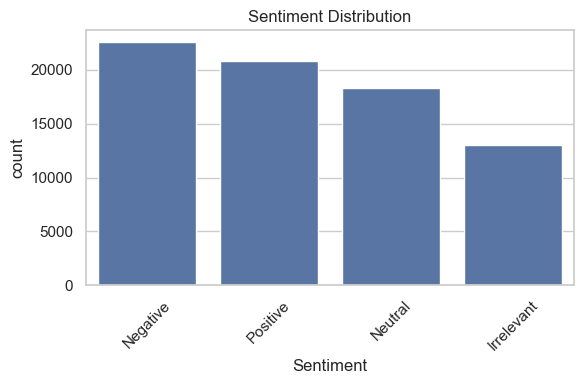

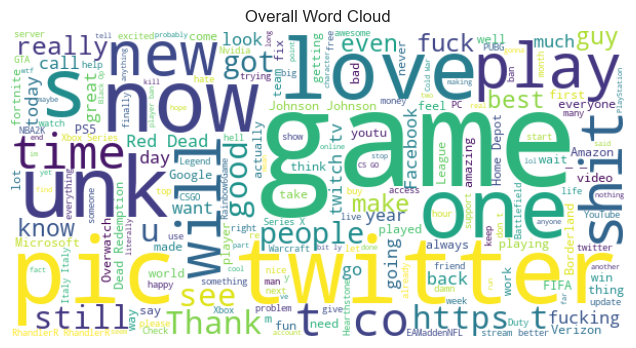

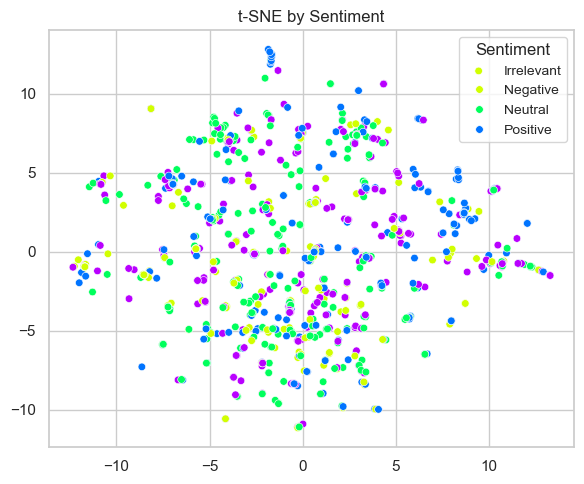

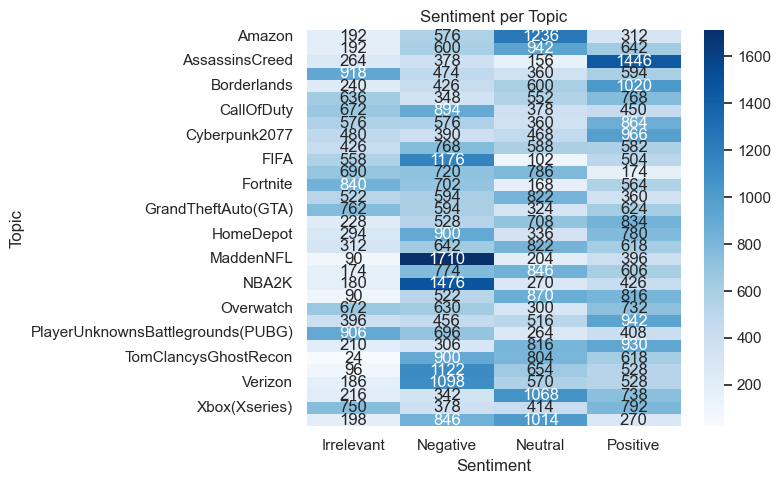

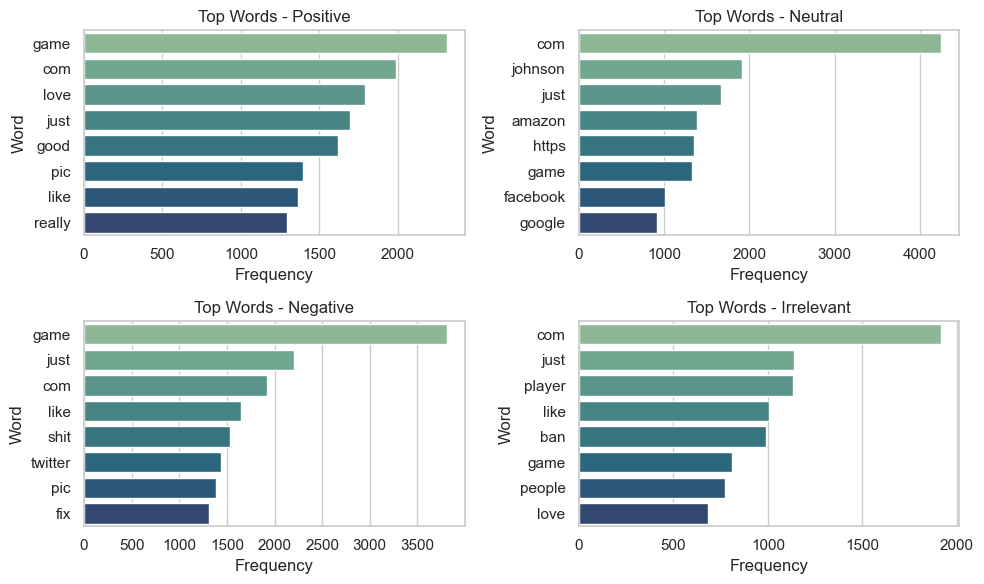

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\Users\asus\Downloads\twitter_training.csv\twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
df = df[['Topic', 'Sentiment', 'Tweet']]
df['Tweet'] = df['Tweet'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

text = " ".join(tweet for tweet in df['Tweet'])
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Overall Word Cloud")
plt.show()

df_sampled = df.sample(n=1000, random_state=42)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_sampled['Tweet']).toarray()

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

le = LabelEncoder()
sentiment_labels = le.fit_transform(df_sampled['Sentiment'])

plt.figure(figsize=(6, 5))
palette = sns.color_palette("hsv", len(le.classes_))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sentiment_labels, palette=palette, legend='full', s=30)
plt.title("t-SNE by Sentiment")
plt.legend(title='Sentiment', labels=le.classes_, loc='best', fontsize='small')
plt.tight_layout()
plt.show()

pivot_table = df.pivot_table(index='Topic', columns='Sentiment', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Sentiment per Topic')
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

def get_top_keywords(sentiment, n=8):
    subset = df[df['Sentiment'] == sentiment]
    vec = CountVectorizer(stop_words='english', max_features=5000)
    X = vec.fit_transform(subset['Tweet'])
    word_sum = X.sum(axis=0)
    words_freq = [(word, word_sum[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    return pd.DataFrame(words_freq, columns=['Word', 'Frequency'])

sentiments = df['Sentiment'].unique()
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(sentiments):
    plt.subplot(2, 2, i+1)
    top_keywords = get_top_keywords(sentiment)
    sns.barplot(x='Frequency', y='Word', hue='Word', data=top_keywords, palette='crest', legend=False)
    plt.title(f"Top Words - {sentiment}")
    plt.tight_layout()
plt.show()


